## The Best Neighborhood in Pittsburgh

### Introduction
Our group decided that the best determiner of a good neighborhood is the infrastructure that the neighborhood has access to. Infrastructure is a key part of any society, and we figured that the neighborhood with the highest quantity of the most important buildings would be the best. We used three datasets, one which contained the locations of hospitals in and around Pittsburgh, one with the locations of schools, and one with information on parking garages to form our results.
    
### Metric

Our metric combines together the number of hospitals in a neighborhood, the number of schools, and the total area of parking garages to get a sense for how much established infrastructure each neighborhood has.

### Dataset #1 Public School Count

Pittsburgh Public School Locations: https://data.wprdc.org/dataset/pittsburgh-public-school-locations

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gps
#import geopy
#from geopy.geocoders import Nominatim
import shapely
from shapely.geometry import Point, Polygon

school = pd.read_csv("https://data.wprdc.org/dataset/46fb3ca4-e844-4b42-b034-e87291d34699/resource/06664b02-c673-49d5-8a70-d3cd1c18ac8d/download/pps_schoolsapr2019publish.csv")
neighborhoods = gps.read_file("Neighborhoods/Neighborhoods_.shp")
m_schools = gps.read_file("mygeodata/pps_schoolsapr2019publish_1-point.shp")
n = pd.read_csv("Neighborhoods_.csv")

I wanted to see if the neighborhood provides every level of education. I divided between Early, Middle, and High. The source id doesn't provide any information for what the school level is. So, I decided to search for key works in the school name, such as: K-5, 6 - 8, or high. The schools that don't have characteristic keywords will be labeled as unidentified. 

Each school will provide 1 point to the overall score. However, if the district provides all levels of education it will gain plus 2 points (since K-8 provides Early and Middle, and 6-12 provides Middle and High; I will consider the school in both categories).  

In [2]:
school.head()

,sourcedid,name,address,city,state,zip,latitude,longitude
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895


This map shows the schools in Pittsburgh.

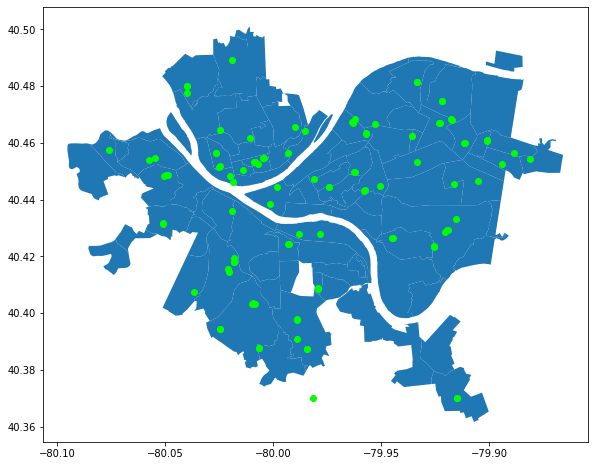

In [3]:
plt.rcParams['figure.figsize'] = [10,8]
ax = m_schools.plot(zorder=2, color="lime")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Early schools map:

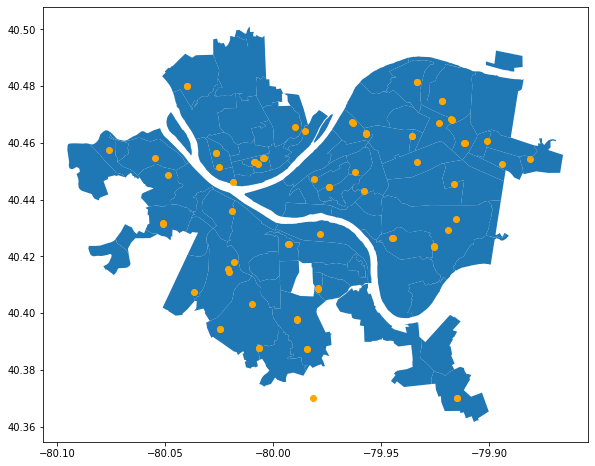

In [4]:
mask_early = m_schools[m_schools['name'].str.contains("K-5|Early|K-8")]
early = dict()
early = mask_early
early.head(10)

ax = early.plot(zorder=2, color="orange")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Middle schools map:

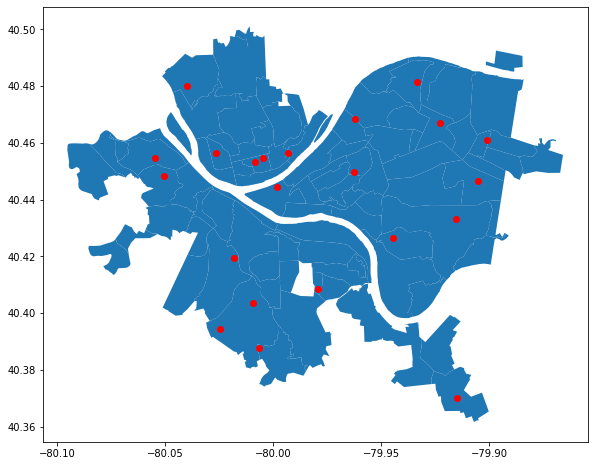

In [5]:
mask_middle = m_schools[m_schools['name'].str.contains("K-8|6-8|Middle|6-12")]
middle = dict()
middle = mask_middle
middle.head(10)

plt.rcParams['figure.figsize'] = [10,8]

ax = middle.plot(zorder=2, color="red")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

High schools map:

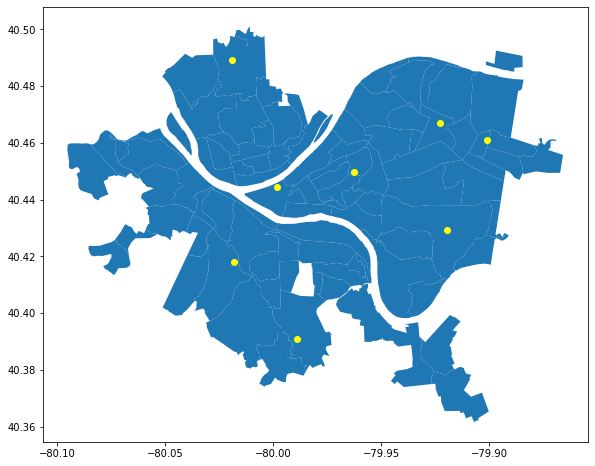

In [6]:
mask_high = m_schools[m_schools['name'].str.contains("High|6-12")]
high = dict()
high = mask_high
high.head(10)

ax = high.plot(zorder=2, color="yellow")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Schools that were not identified map:

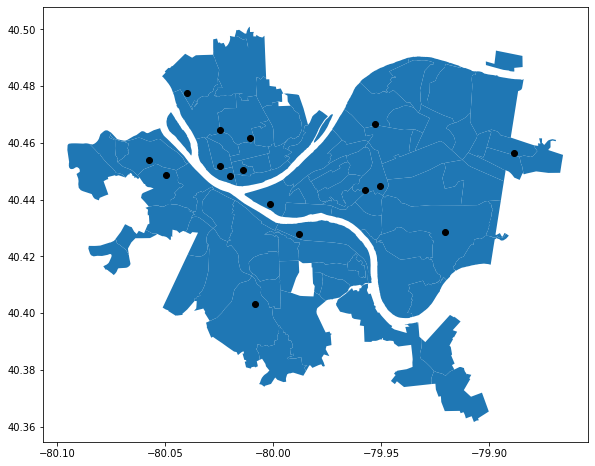

In [7]:
mask_null = m_schools[~m_schools['name'].str.contains("K-8|6-8|Middle|6-12|High|K-5|Early")]
unidentified = dict()
unidentified = mask_null
unidentified.head(10)

ax = unidentified.plot(zorder=2, color="black")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Scatter plot map with all different schools:

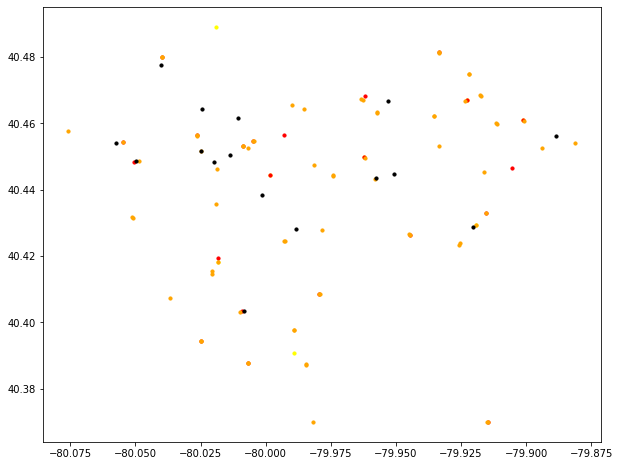

In [8]:
plt.scatter(high['longitude'], high['latitude'], color='yellow', s=10)
plt.scatter(middle['longitude'], middle['latitude'], color='red', s=10)
plt.scatter(early['longitude'], early['latitude'], color='orange', s=10)
plt.scatter(unidentified['longitude'], unidentified['latitude'], color='black', s=10)

In [9]:
nei = {}
for i in neighborhoods['hood']:
    nei[i]=[0,0,0,0]

In [10]:
early_school_points = []
for i, row in early.iterrows():
    early_school_points.append(Point(row['longitude'], row['latitude']))

In [11]:
middle_school_points = []
for i, row in middle.iterrows():
    middle_school_points.append(Point(row['longitude'], row['latitude']))

In [12]:
high_school_points = []
for i, row in high.iterrows():
    high_school_points.append(Point(row['longitude'], row['latitude']))

In [13]:
unidentified_school_points = []
for i, row in unidentified.iterrows():
    unidentified_school_points.append(Point(row['longitude'], row['latitude']))

In [14]:
for ind,row in neighborhoods.iterrows():
    for j in early_school_points:
            if(row['geometry'].contains(j)):
                nei[row['hood']][2]+=1

In [15]:
for ind,row in neighborhoods.iterrows():
    for j in middle_school_points:
            if(row['geometry'].contains(j)):
                nei[row['hood']][1]+=1

In [16]:
for ind,row in neighborhoods.iterrows():
    for j in high_school_points:
            if(row['geometry'].contains(j)):
                nei[row['hood']][0]+=1

In [17]:
for ind,row in neighborhoods.iterrows():
    for j in unidentified_school_points:
            if(row['geometry'].contains(j)):
                nei[row['hood']][3]+=1

Calculations:

In [18]:
calc = {}
i=0
plus =0

for hood in nei:
    if nei[hood][0] >= 1:
        if nei[hood][1] >= 1:
            if nei[hood][2] >= 1:
                plus = 2
    calc.update({hood : nei[hood][0] + nei[hood][1] + nei[hood][2] + nei[hood][3] + plus})

print(calc)

{'Central Oakland': 0, 'North Oakland': 3, 'West Oakland': 0, 'Crawford-Roberts': 0, 'Strip District': 0, 'Central Business District': 3, 'Spring Hill-City View': 1, 'Perry South': 1, 'Summer Hill': 0, 'Northview Heights': 0, 'Westwood': 2, 'Beltzhoover': 0, 'Central Lawrenceville': 1, 'South Side Flats': 2, 'Allentown': 2, 'South Side Slopes': 0, 'Bluff': 0, 'Fineview': 0, 'Hazelwood': 0, 'Lincoln-Lemington-Belmar': 0, 'East Hills': 1, 'South Oakland': 0, 'Mount Washington': 0, 'Greenfield': 3, 'Squirrel Hill South': 9, 'Central Northside': 2, 'Spring Garden': 2, 'Troy Hill': 3, 'East Allegheny': 3, 'Stanton Heights': 5, 'Lower Lawrenceville': 5, 'Bloomfield': 4, 'Carrick': 7, 'Point Breeze': 4, 'Duquesne Heights': 3, 'Swisshelm Park': 2, 'Highland Park': 4, 'Garfield': 2, 'Manchester': 7, 'Upper Lawrenceville': 2, 'Beechview': 7, 'Brookline': 8, 'Morningside': 2, 'Larimer': 4, 'North Shore': 2, 'Bon Air': 2, 'Banksville': 3, 'Windgap': 3, 'Friendship': 4, 'Arlington': 2, 'St. Clair':

In [19]:
dict(sorted(calc.items(), key=lambda item: item[1], reverse=True))    

{'Squirrel Hill South': 9,
 'Allegheny Center': 9,
 'Brookline': 8,
 'Carrick': 7,
 'Manchester': 7,
 'Beechview': 7,
 'East Liberty': 7,
 'Brighton Heights': 6,
 'Stanton Heights': 5,
 'Lower Lawrenceville': 5,
 'Mt. Oliver': 5,
 'Sheraden': 5,
 'Crafton Heights': 5,
 'Lincoln Place': 5,
 'Overbrook': 5,
 'Homewood West': 5,
 'Upper Hill': 5,
 'Bloomfield': 4,
 'Point Breeze': 4,
 'Highland Park': 4,
 'Larimer': 4,
 'Friendship': 4,
 'Chateau': 4,
 'Middle Hill': 4,
 'North Oakland': 3,
 'Central Business District': 3,
 'Greenfield': 3,
 'Troy Hill': 3,
 'East Allegheny': 3,
 'Duquesne Heights': 3,
 'Banksville': 3,
 'Windgap': 3,
 'Allegheny West': 3,
 'Shadyside': 3,
 'Bedford Dwellings': 3,
 'Marshall-Shadeland': 3,
 'Homewood South': 3,
 'Homewood North': 3,
 'Perry North': 3,
 'Westwood': 2,
 'South Side Flats': 2,
 'Allentown': 2,
 'Central Northside': 2,
 'Spring Garden': 2,
 'Swisshelm Park': 2,
 'Garfield': 2,
 'Upper Lawrenceville': 2,
 'Morningside': 2,
 'North Shore': 2,
 

According to the data the best neighborhood school-wise is Squirrel Hill South and Allegheny Center.

### Dataset #2 Hospital Count

In [20]:
hospitals = pd.read_csv("Hospital_locations/data-hospitallocations.csv")
hospital_points = []
for i, row in hospitals.iterrows():
    hospital_points.append(Point(row['X'], row['Y']))
hospitals.head(10)

,Facility,Address,Y,X
0,UPMC Children's,"4401 Penn Avenue Pittsburgh, PA 15224",40.467315,-79.953590
1,UPMC Magee,"300 Halkett Street Pittsburgh, PA 15213",40.436889,-79.960700
2,UPMC McKeesport,"1500 5th Avenue McKeesport, PA 15132",40.351343,-79.849457
3,UPMC Mercy,"1400 Locust Street Pittsburgh, PA 15219",40.436137,-79.985285
4,UPMC Passavant,"9100 Babcock Boulevard Pittsburgh, PA 15237",40.573319,-80.014525
5,UPMC Presbyterian,"3601 Fifth Avenue Pittsburgh, PA 15213",40.441544,-79.959356
6,UPMC Shadyside,"5230 Center Ave Pittsburgh, PA 15232",40.454845,-79.939793
7,UPMC St. Margaret's,"815 Freeport Road Pittsburgh, PA 15215",40.489286,-79.895994
8,UPMC East,"2775 Mosside Boulevard Monroeville, PA 15146",40.436561,-79.760197
9,Allegheny General Hospital,"AGH 320 E. North Ave, PGH 15212",40.457010,-80.003724


In [21]:
neighborhoods = gps.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhood_score={}

In [22]:
for i in neighborhoods['objectid']:
    neighborhood_score[i]=0.0

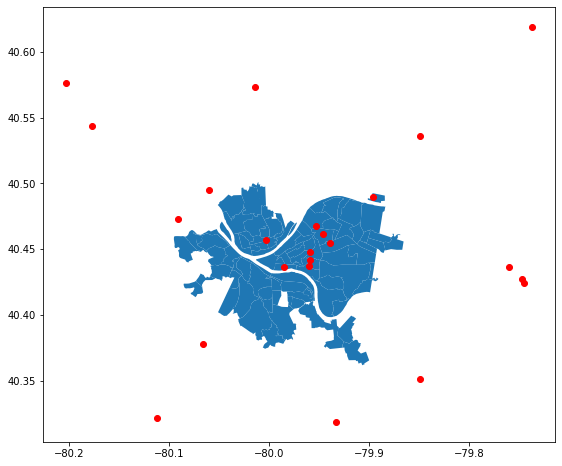

In [23]:
neighborhoods = gps.read_file("Neighborhoods/Neighborhoods_.shp")
hospital_map = gps.read_file("Hospital_locations/data-hospitallocations-point.shp")
ax = hospital_map.plot(zorder=2, color="red")
neighborhoods.plot(ax=ax, zorder=1)
plt.show()

Map of the location of all hospitals in Allegheny County relative to Pittsburgh.

In [24]:
hospital_scalar=2.0#use this to weight how important hospitals are relative to other types of infrastructure
for ind,row in neighborhoods.iterrows():
    for j in hospital_points:
            if(row['geometry'].contains(j)):
                calc[row['hood']]+=(1.0*hospital_scalar)

In [25]:
dict(sorted(calc.items(), key=lambda item: item[1], reverse=True))    

{'Squirrel Hill South': 9,
 'Allegheny Center': 9,
 'Brookline': 8,
 'Carrick': 7,
 'Manchester': 7,
 'Beechview': 7,
 'East Liberty': 7,
 'Bloomfield': 6.0,
 'Brighton Heights': 6,
 'North Oakland': 5.0,
 'Stanton Heights': 5,
 'Lower Lawrenceville': 5,
 'Mt. Oliver': 5,
 'Sheraden': 5,
 'Shadyside': 5.0,
 'Crafton Heights': 5,
 'Lincoln Place': 5,
 'Overbrook': 5,
 'Homewood West': 5,
 'Upper Hill': 5,
 'Central Northside': 4.0,
 'Point Breeze': 4,
 'Highland Park': 4,
 'Larimer': 4,
 'Friendship': 4,
 'Chateau': 4,
 'Middle Hill': 4,
 'Central Business District': 3,
 'Central Lawrenceville': 3.0,
 'Greenfield': 3,
 'Troy Hill': 3,
 'East Allegheny': 3,
 'Duquesne Heights': 3,
 'Banksville': 3,
 'Windgap': 3,
 'Allegheny West': 3,
 'Bedford Dwellings': 3,
 'Marshall-Shadeland': 3,
 'Homewood South': 3,
 'Homewood North': 3,
 'Perry North': 3,
 'West Oakland': 2.0,
 'Westwood': 2,
 'South Side Flats': 2,
 'Allentown': 2,
 'Bluff': 2.0,
 'Lincoln-Lemington-Belmar': 2.0,
 'South Oakland

After adding the scaled hospital count to the dictionary, Squirrel Hill South and Allegheny Center are still in the lead.

## Data Set # 3: Parking Garages ##

We decided to look at parking garages as it's another metric to show the best infrastructure in a neighborhood. The larger the space for parking, the better. We decided to look at overall perimeter for the parking garages in the area. 

In [26]:
df = pd.read_csv("residential_permit.csv",  index_col="neighborho", 
                           parse_dates=True)

df.head(10)

,objectid,area,perimeter,permitpk_,permitpk_i,code,number,acres,sqmiles,uniqueid,...,district,code_rpp,code_district,created_user,created_date,last_edited_user,last_edited_date,expiration_date,Shape__Area,Shape__Length
neighborho,,,,,,,,,,,,,,,,,,,,,
GARFIELD,1661,NaN,1794.414415,3.0,102.0,I,0.0,2.618,0.000,1.0,...,Garifield,I,I - Garifield,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires May 1st,3.737608e+05,3059.453089
SOUTH SIDE FLATS,1662,NaN,0.000000,0.0,0.0,CC,0.0,31.399,0.000,0.0,...,South Side,CC,CC - South Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires January 1st,1.892114e+06,7149.177081
SOUTH SIDE FLATS,1663,NaN,5103.253204,0.0,0.0,DD,0.0,11.785,0.022,0.0,...,South Side,DD,DD - South Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires January 1st,1.799404e+06,9074.841352
CENTRAL NORTHSIDE,1664,NaN,4981.569181,8.0,6.0,L,0.0,19.779,0.033,1.0,...,North Side,L,L - North Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires January 1st,8.699288e+05,5146.016086
LAWRENCEVILLE,1665,NaN,NaN,NaN,NaN,GG,NaN,NaN,NaN,NaN,...,Lawrenceville,GG,GG - Lawrenceville,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires March 1st,6.136340e+05,3862.527254
SOUTH SIDE FLATS,1666,NaN,NaN,NaN,NaN,KK,NaN,NaN,NaN,NaN,...,NaN,KK,KK - South Side Flats,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires August 1st,4.278406e+05,2993.209780
,1667,NaN,0.000000,0.0,0.0,FF,0.0,0.000,0.000,0.0,...,Schenley Farms,FF,FF - Schenley Farms,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires February 1st,1.071561e+06,4581.635756
EAST ALLEGHENY,1668,NaN,7245.381613,10.0,7.0,F,0.0,49.042,0.077,1.0,...,East Allegheny-East North Side,F,F - East Allegheny-East North Side,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires February 1st,2.136249e+06,7245.380979
LAWRENCEVILLE,1669,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,...,Lawrenceville,A,A - Lawrenceville,pgh.admin,2021/02/23 17:45:48.386+00,pgh.admin,2021/02/23 17:45:48.386+00,Permit Expires March 1st,3.770040e+06,10685.607314


In [27]:
# import dataset
perimeter = pd.read_csv("residential_permit.csv")
# filter to important info
num_per = perimeter.groupby("neighborho").sum()['perimeter']
num_per.sort_values(ascending=False)

neighborho
SHADYSIDE                      68506.365372
SQUIRREL HILL NORTH            44740.248789
BLOOMFIELD                     36761.993724
NORTH OAKLAND                  18911.784857
CRAWFORD ROBERTS               16428.660601
BEECHVIEW                      16117.572500
ALLEGHENY WEST                 15137.479481
WEST OAKLAND                   11519.152242
SOUTH OAKLAND                  11112.974446
CENTRAL OAKLAND                 8878.735776
HOMEWOOD SOUTH                  7860.071848
MT WASHINGTON                   7302.633216
BLUFF                           7274.270662
EAST ALLEGHENY                  7245.381613
SOUTH SIDE FLATS                5103.253204
CENTRAL NORTHSIDE               4981.569181
GARFIELD                        1794.414415
FRIENDSHIP                         0.000000
SQURREL HILL NORTH &  SOUTH        0.000000
LAWRENCEVILLE                      0.000000
POINT BREEZE                       0.000000
                                   0.000000
Name: perimeter, dtyp

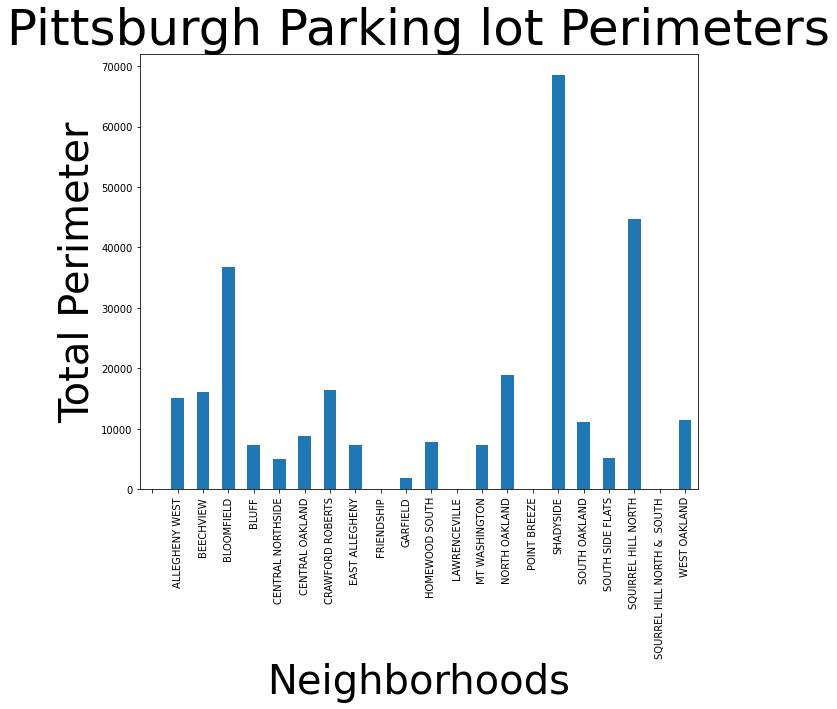

In [28]:
pd.Series(num_per).plot.bar()
pd.Series(num_per).plot(x = 'neighborho', y = "perimeter", kind = "bar")
plt.title('Pittsburgh Parking lot Perimeters', size = 50)
plt.xlabel("Neighborhoods", size = 40)
plt.ylabel("Total Perimeter", size = 40)
plt.rcParams["figure.figsize"] = (60,30)
plt.rc('xtick', labelsize=40)
plt.show()

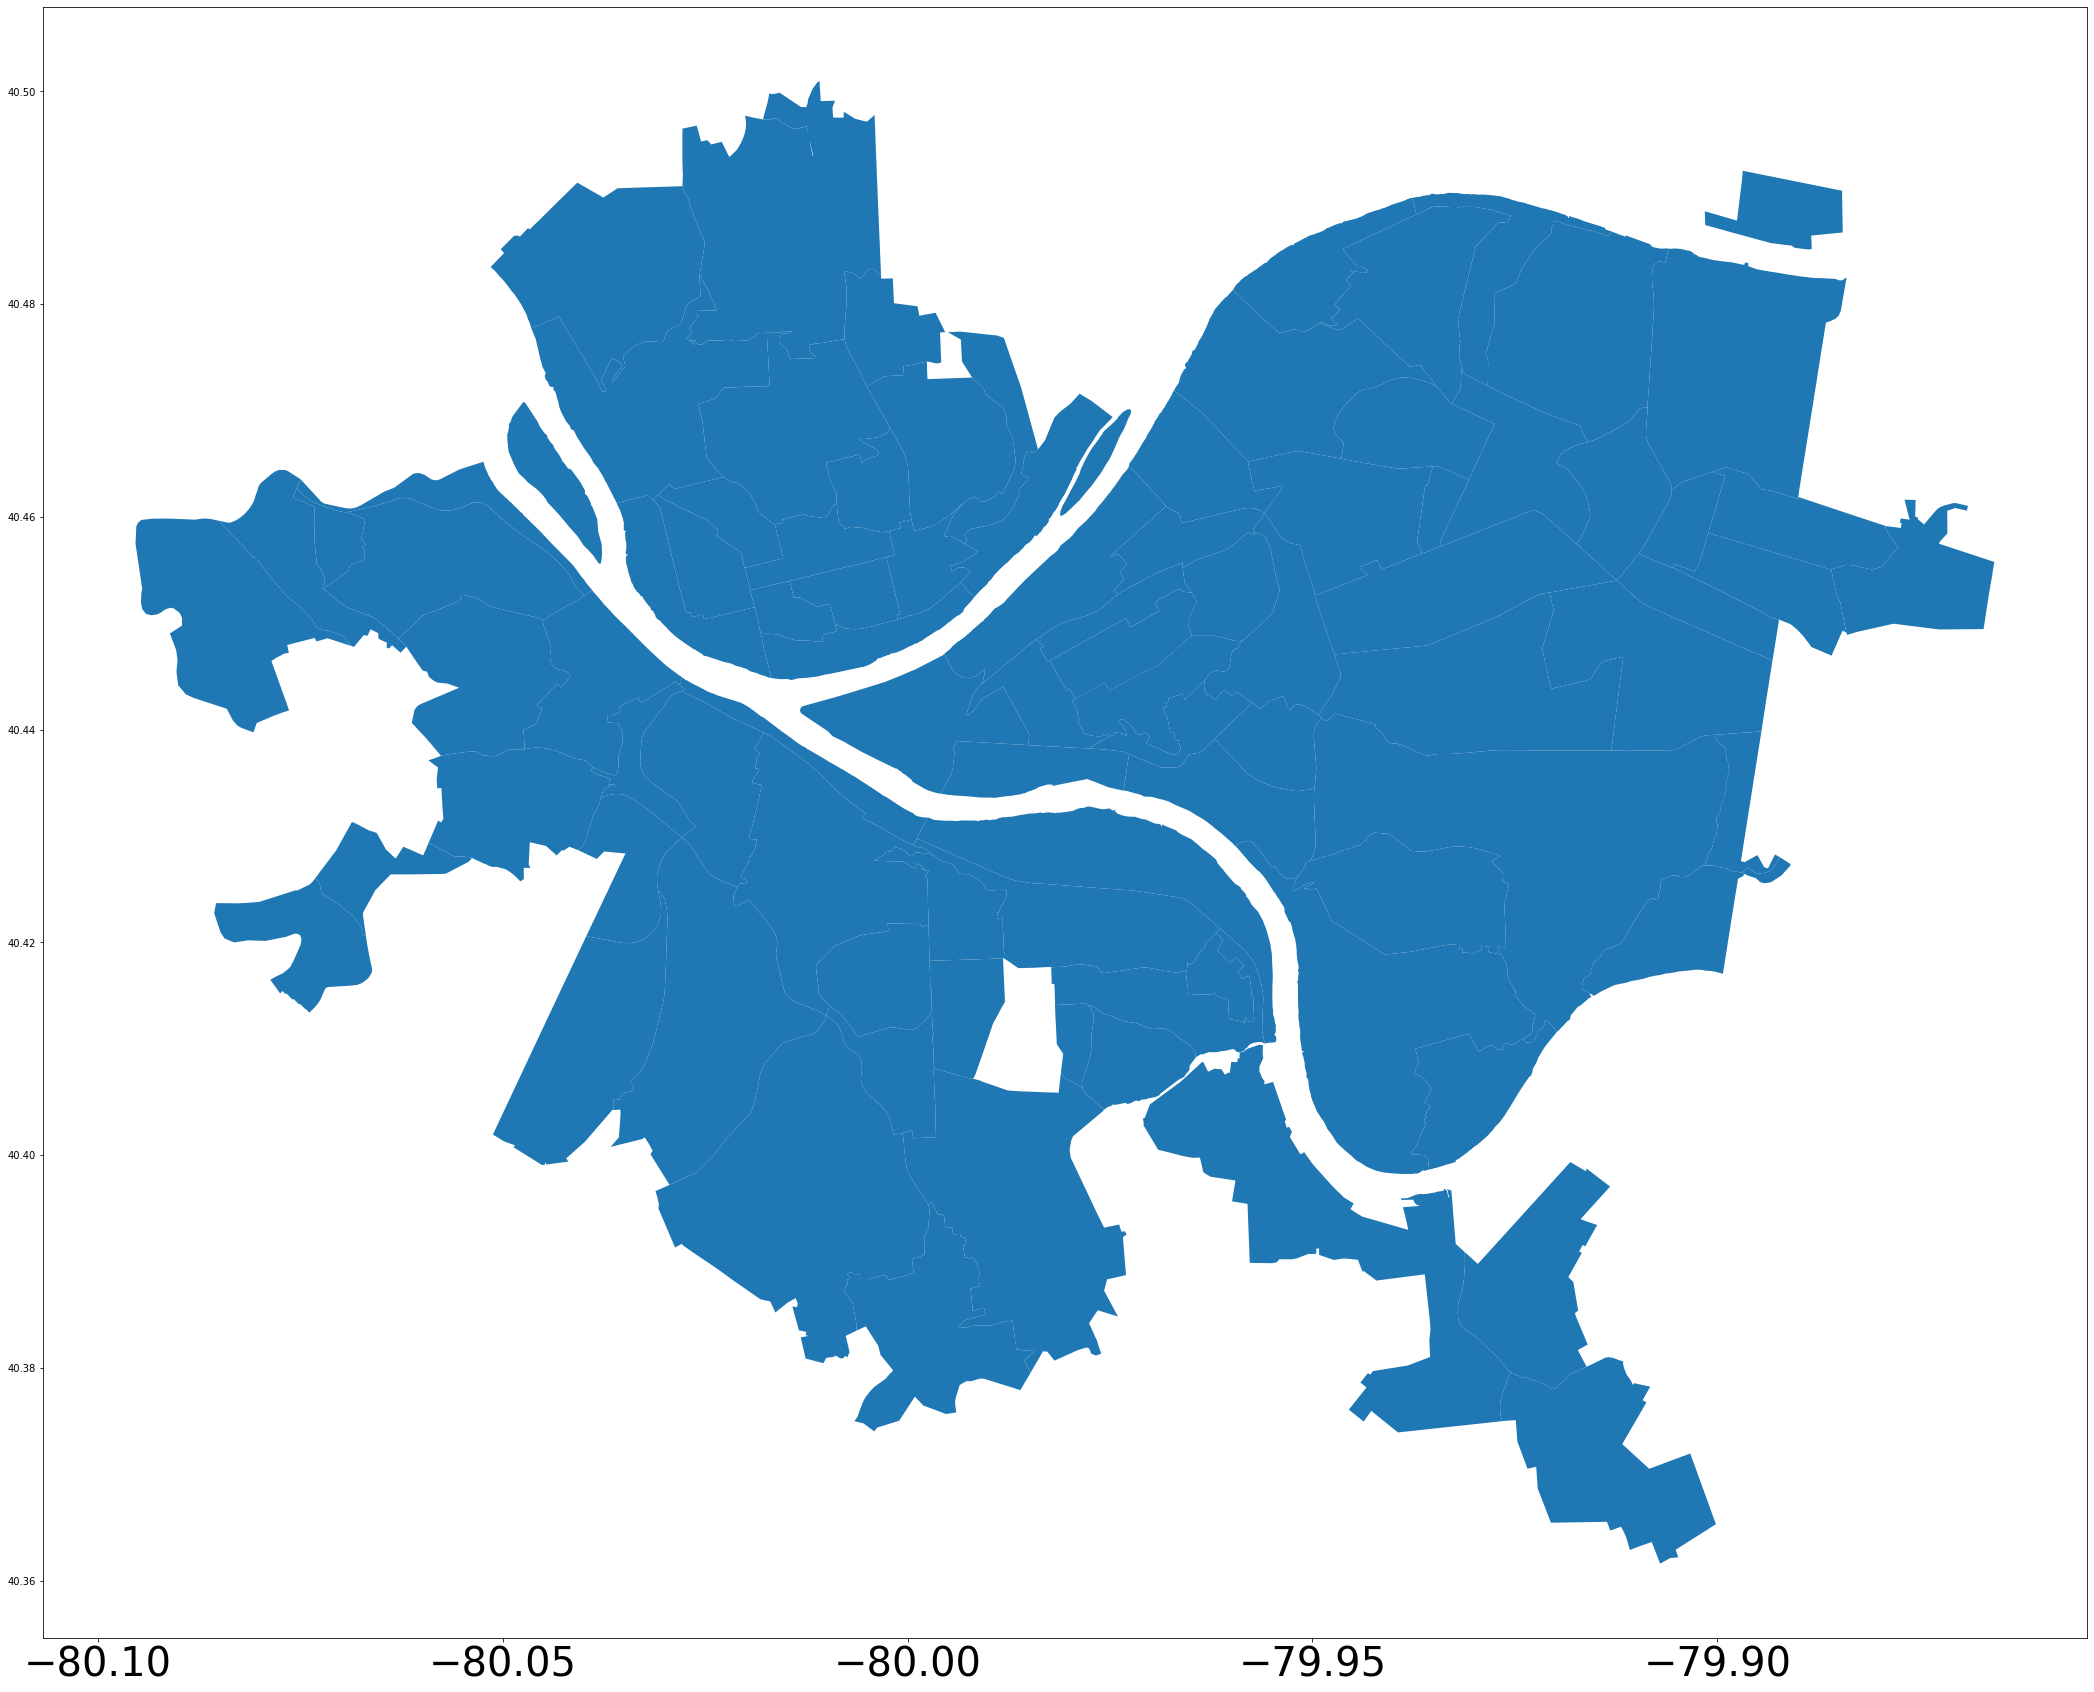

In [30]:
neighborhoods = gps.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe


In [31]:
print("Top 10 Neighborhoods for Parking in Pittsburgh")
print()
num_per.sort_values(ascending=False)[:10]

Top 10 Neighborhoods for Parking in Pittsburgh



neighborho
SHADYSIDE              68506.365372
SQUIRREL HILL NORTH    44740.248789
BLOOMFIELD             36761.993724
NORTH OAKLAND          18911.784857
CRAWFORD ROBERTS       16428.660601
BEECHVIEW              16117.572500
ALLEGHENY WEST         15137.479481
WEST OAKLAND           11519.152242
SOUTH OAKLAND          11112.974446
CENTRAL OAKLAND         8878.735776
Name: perimeter, dtype: float64

In [32]:
parking_scalar=0.0001#this normalizes the parking lot perimeter data to be in line with the rest of the data
for ind, val in num_per.iteritems():
    if(type(ind)==type(str())):
        temp_str=ind.lower().title()
        try:
            calc[temp_str]+=(parking_scalar*val)
        except:
            continue

## Conclusion ##

With this data we can conclude that Shadyside is the best neighborhood as it contains the most infrastructure based on our metric taking into account schools, hospitals, and parking garages. This means that Shadyside has the most support structure in place to help support business growth and homeowners alike, resulting in better economic development and overall quality of living for everyone living there. The biggest contributor to Shadyside's score, parking garage space, serves as the best indicator of economic development compared to the two other metrics, which both focus more on supporting individuals and families.